In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import to_categorical


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


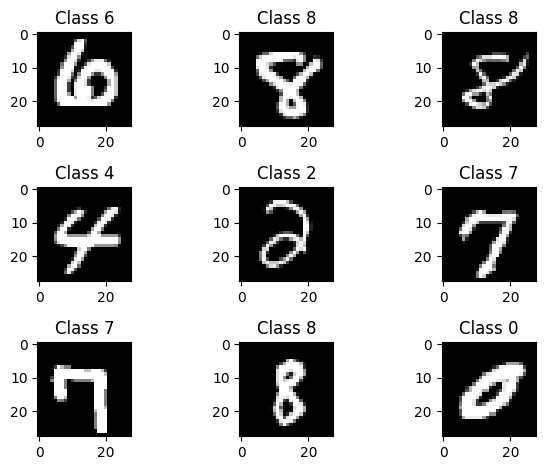

In [4]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

In [5]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255
X_test = X_test.reshape(10000, 784).astype('float32') / 255

In [6]:
no_classes = 10
Y_train = to_categorical(y_train, no_classes)
Y_test = to_categorical(y_test, no_classes)

In [7]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [8]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

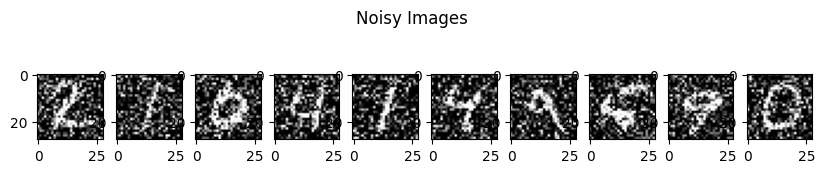

In [9]:
plt.figure(figsize=(10, 2))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
plt.suptitle("Noisy Images")
plt.show()

In [10]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [12]:
autoencoder.fit(X_train_noisy, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.3365 - val_loss: 0.1982
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1891 - val_loss: 0.1728
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1684 - val_loss: 0.1587
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1575 - val_loss: 0.1500
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1500 - val_loss: 0.1457
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1454 - val_loss: 0.1421
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1422 - val_loss: 0.1391
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1392 - val_loss: 0.1370
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1367 - val_loss: 0.1347
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1343 - val_loss: 0.1330


In [13]:
reconstructed_images = autoencoder.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


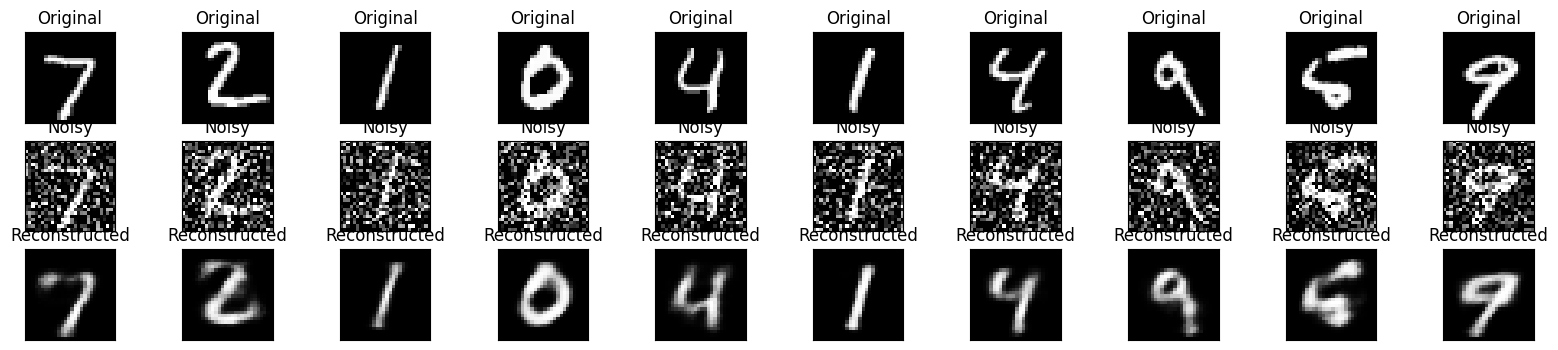

In [17]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Original images
    ax = plt.subplot(3, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
     # Noisy images
    ax = plt.subplot(3, 10, i + 1 + 10)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Reconstructed images
    ax = plt.subplot(3, 10, i + 1 + 20)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()